In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
TRAIN_DATA_DIR = 'train_data/'
filename = 'VAE_CELL_CNN_latent512_loss_data.csv'

train_df = pd.read_csv(TRAIN_DATA_DIR + filename)

In [59]:
train_df


,train_loss,train_mse_loss,train_kld_loss,val_loss,val_mse_loss,val_kld_loss,test_loss,test_mse_loss,test_kld_loss
0,9120.027551,7376.777688,1743.249861,6101.843327,4290.357249,1811.486081,5117.691226,3062.500273,2055.190947
1,6656.606437,4758.659763,1897.946674,5584.002017,3638.119368,1945.882652,5117.691226,3062.500273,2055.190947
2,6403.645487,4449.622713,1954.022772,5479.472707,3476.558746,2002.913963,5117.691226,3062.500273,2055.190947
3,6285.965163,4300.627391,1985.337774,5358.411529,3396.104989,1962.306543,5117.691226,3062.500273,2055.190947
4,6219.968218,4213.270782,2006.697436,5327.877703,3302.116763,2025.760936,5117.691226,3062.500273,2055.190947
5,6172.482494,4150.309217,2022.173276,5232.417696,3206.502910,2025.914778,5117.691226,3062.500273,2055.190947
6,6143.614756,4116.260713,2027.354043,5204.961674,3214.169158,1990.792519,5117.691226,3062.500273,2055.190947
7,6119.868833,4090.639107,2029.229723,5247.224232,3215.157238,2032.066993,5117.691226,3062.500273,2055.190947
8,6103.215798,4072.781293,2030.434507,5198.153298,3192.464582,2005.688707,5117.691226,3062.500273,2055.190947
9,6087.671604,4055.061060,2032.610544,5196.457891,3161.338821,2035.119073,5117.691226,3062.500273,2055.190947


In [60]:
# df to dict

# loss_plots(train_df, title=filename)

# Compare models reconstruction on some samples

In [61]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from dataset_tools import OwnDataset, make_train_test_val_split
import matplotlib

cuda = torch.cuda.is_available()

In [62]:
tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    # transforms.Lambda(lambda x: x.view(-1)) # notice that we dont flatten when we are going to use CNN
])

# dataset = OwnDataset(transform=tf)
dataset = OwnDataset(transform=tf, path=r"C:\Users\Otto\Desktop\Fagprojekt_data\labelled_data")

batch_size = 64
train_subset, test_subset, val_subset = make_train_test_val_split(dataset)


train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, pin_memory=cuda, drop_last=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=True, pin_memory=cuda, drop_last=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, pin_memory=cuda, drop_last=True)

print(len(dataset), len(train_loader), len(test_loader), len(val_loader))



488396 4883 1526 1221


## Load the models we want to compare

In [68]:
# there are 3 different unsupervised models to choose from on the cell dataset
from models import VAE_CELL_CNN, VAE_LAFARGE, CELL_CNN_AutoEncoder
from loss_functions import loss_function
# import mse loss


# now we load the saved models into the model class
MODEL_DIR = "trained_models/"

vae_cnn_own = VAE_CELL_CNN(input_dim=(3,68,68), hidden_dim=512, latent_dim=256)
vae_cnn_own.load_state_dict(torch.load(MODEL_DIR + f"{vae_cnn_own.__class__.__name__}_latent{vae_cnn_own.latent_dim}_best_model.pth"))

# vae_lafarge = VAE_LAFARGE(input_dim=(3,68,68), hidden_dim=512, latent_dim=256)
# vae_lafarge.load_state_dict(torch.load(MODEL_DIR + f"{vae_lafarge.__class__.__name__}_latent{vae_lafarge.latent_dim}_best_model.pth"))

ae_cnn_own = CELL_CNN_AutoEncoder(latent_dim=256)
ae_cnn_own.load_state_dict(torch.load(MODEL_DIR + f"{ae_cnn_own.__class__.__name__}_latent{ae_cnn_own.latent_dim}_best_model.pth"))


vae_cnn_own_b0 = VAE_CELL_CNN(input_dim=(3,68,68), hidden_dim=512, latent_dim=256)
vae_cnn_own_b0.load_state_dict(torch.load(MODEL_DIR + f"{vae_cnn_own_b0.__class__.__name__}_latent{vae_cnn_own_b0.latent_dim}_b0_best_model.pth"))


# models = [vae_cnn_own]
models = [vae_cnn_own, ae_cnn_own, vae_cnn_own_b0]
# models = [ae_cnn_own]



## Evaluate performance on test set given by the loss

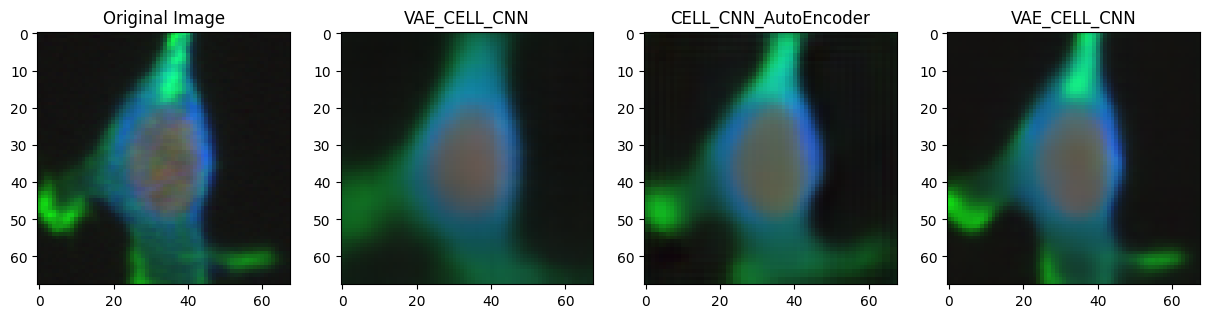

In [72]:
# Given an input image, create a reconstruction of the image using each model


def reconstruct_image(model, image):
    with torch.no_grad():
        model.eval()
        image = image.unsqueeze(0)
        output = model(image)
        if isinstance(output, dict):
            x_hat = output["x_hat"]
        else:
            x_hat = output
        return x_hat.squeeze(0)
    
x, y = next(iter(train_loader))


# plot the original image and the reconstructed image
# reconstruct_image(vae_cnn_own, x[0]).shape
reconstruct_image(ae_cnn_own, x[0]).shape




def plot_reconstructions(models, image):
    fig, ax = plt.subplots(1, len(models)+1, figsize=(15, 5))
    ax[0].imshow(image.permute(1, 2, 0))
    ax[0].set_title("Original Image")
    for i, model in enumerate(models):
        x_hat = reconstruct_image(model, image)
        ax[i+1].imshow(x_hat.permute(1, 2, 0))
        ax[i+1].set_title(model.__class__.__name__)
    plt.show()

plot_reconstructions(models, x[0])

